MNIST 데이터는 숫자 0부터 9까지의 이미지로 구성된 손끌씨 데이터셋이다. <br>
60,000개의 훈련 데이터셋과 10,000개의 테스트 데이터셋을 가지고 있다. <br>
이때 각 이미지는 28*28 크기를 가진다.

## <strong> 1. 토치비전 </strong>

**토치비전(torchvision)**은 유명한 데이터셋들, 이미 구현된 유명 모델들, 이미지 전처리 도구들을 포함하는 패키지이다.

## <strong> 2. 사전 설정 </strong>

먼저 필요한 도구를 가져오자.

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

현재 환경에서 GPU 연산이 가능하다면 GPU 연산을 하고, 그렇지 않다면 CPU 연산을 하도록 하자.

In [3]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니면 False 리턴
print(USE_CUDA)

True


랜덤 시드를 고정하자

In [4]:
random.seed(777)
torch.manual_seed(777)
if USE_CUDA == True:
  torch.cuda.manual_seed_all(777)

하이퍼파라미터를 선언하자

In [5]:
# hyperparameters
training_epochs = 15
batch_size = 100

## <strong> 3. MNIST 분류기 구현 </strong>

torchvision.datasets.dset.MNIST를 사용하면 MNIST 데이터셋을 불러올 수 있다.

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



* root: MNIST 데이터를 다운 받을 경로를 지정한다.
* train: True일 땐 훈련 데이터를 리턴받고, False는 테스트 데이터를 리턴받는다.
* trainsform: 현재 데이터를 파이토치 텐서로 변환해 준다.
* download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미이다.

**DataLoader**를 사용해보자.

In [7]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

* dataset: 로드할 대상을 지정한다.
* batch_size: 배치 크기를 지저한다.
* shuffle: 매 에포크마다의 미니 배치 셔플 여부를 지정한다.
* drop_last: 마지막 배치를 버릴지 말지를 정한다.

[참고] 1000개의 데이터가 있을 때 배치 크기가 128이라면 104개가 나머지로 남는다. <br>
이때 **마지막 배치가 다른 미니 배치보다 개수가 적기 때문에 해당 배치가 과대 평가될 수 있다.**

이제 모델을 설계해보자

In [9]:
# 784(28*28)에서 10(0~9)개의 차원으로 줄여야 한다.
linear = nn.Linear(784, 10, bias = True).to('cuda')

**to()** 함수는 연산을 어디서 수행할지 정하며 모델의 매개변수를 지정한 장치의 메모리로 보낸다. <br>
CPU를 사용할 경우 필요 없지만 GPU의 경우 **to('cuda')**를 사용해야 한다.

bias는 편향 b를 사용할 것인지 지정한다. <br>
기본값은 True지만 명시적으로 작성했다.

In [10]:
criterion = nn.CrossEntropyLoss().to('cuda')
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

[참고] **torch.nn.CrossEntropyLoss()**와 **torch.nn.functional.cross_entropy()**는 동일한 역할을 수행한다.

In [13]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    X = X.view(-1, 28*28).to('cuda')
    Y = Y.to('cuda')

    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch
  
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.534725845
Epoch: 0002 cost = 0.359338045
Epoch: 0003 cost = 0.331415087
Epoch: 0004 cost = 0.316436231
Epoch: 0005 cost = 0.307188779
Epoch: 0006 cost = 0.300452590
Epoch: 0007 cost = 0.295006514
Epoch: 0008 cost = 0.290892690
Epoch: 0009 cost = 0.287315220
Epoch: 0010 cost = 0.284540385
Epoch: 0011 cost = 0.282002330
Epoch: 0012 cost = 0.279827952
Epoch: 0013 cost = 0.277784973
Epoch: 0014 cost = 0.276090294
Epoch: 0015 cost = 0.274442732


Accuracy: 0.8885999917984009
Label:  3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


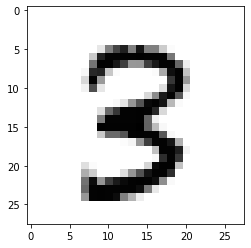

In [18]:
# test
X_test = mnist_test.test_data.view(-1, 28 * 28).float().to('cuda')
Y_test = mnist_test.test_labels.to('cuda')

prediction = linear(X_test)
correct_prediction = torch.argmax(prediction, 1) == Y_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

# MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to('cuda')
Y_single_data = mnist_test.test_labels[r:r + 1].to('cuda')

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

출처: https://wikidocs.net/60324